C:\Users\Chandralekha Podili\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



 metrics 
 -------------------------------------------------- 
           LogisticReg   Bagging RandomForest  Boosting
accuracy     0.805778  0.805333     0.810222     0.804
precision    0.620758  0.617822      0.61809  0.631702
recall       0.312563  0.313568     0.370854  0.272362

 create precision_recall_curve 
 -------------------------------------------------- 



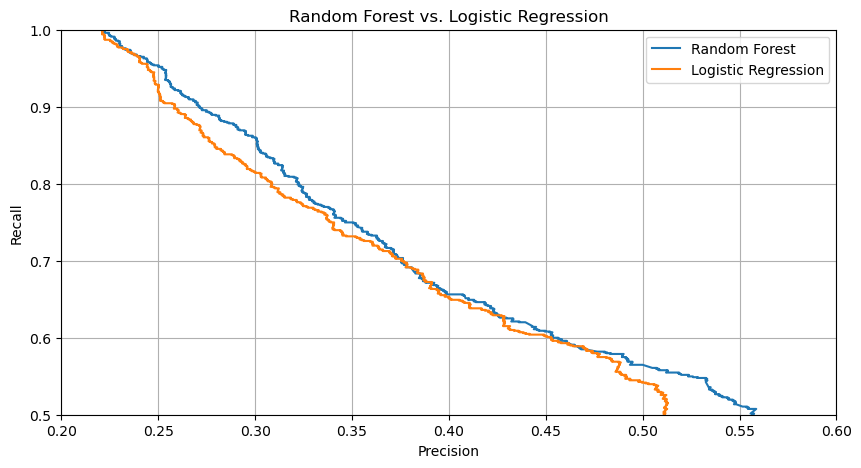


 -------------------------------------------------- 
Random Forest classifier with threshold of 0.12

 Confusion matrix 
 -------------------------------------------------- 
 PREDICTION   pay  default  Total
TRUE                            
pay         1602     1903   3505
default      160      835    995
Total       1762     2738   4500
Recall:  84.0
Precision:  30.0


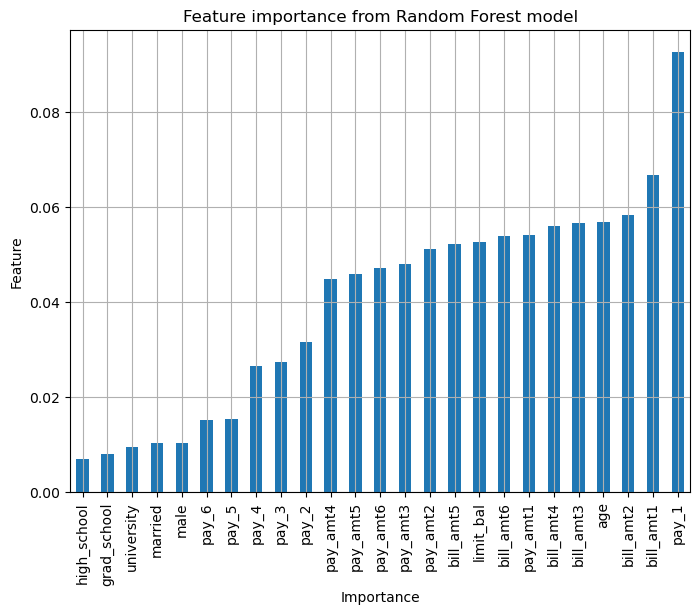

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
 
 
 
data_path= r"C:\Users\Chandralekha Podili\Downloads\Default-Credit-Cards-main\Default-Credit-Cards-main\Data\credit-card-default.csv"
df = pd.read_csv(data_path)
df.rename(columns=lambda x: x.lower(), inplace=True)
df.rename(columns={'pay_0':'pay_1','default payment next month':'default'}, inplace=True)
df['grad_school'] = (df['education'] == 1).astype('int')
df['university'] = (df['education'] == 2).astype('int')
df['high_school'] = (df['education'] == 3).astype('int')
df['male'] = (df['sex']==1).astype('int')
df['married'] = (df['marriage'] == 1).astype('int')
df.drop(['sex','marriage', 'education'], axis=1, inplace=True)
 
pay_features = ['pay_' + str(i) for i in range(1,7)]
for p in pay_features:
    df[p] = (df[p] > 0).astype(int)
 
 
 
#Setting target as default 
target_name = 'default'
robust_scaler = RobustScaler()
X = df.drop('default', axis=1)
 
feature_names = X.columns
X = robust_scaler.fit_transform(X)
 
 
y = df[target_name]
 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=55, stratify=y)
 
# Data frame for evaluation metrics
metrics = pd.DataFrame(index=['accuracy', 'precision' ,'recall'],
                      columns=['LogisticReg', 'Bagging', 'RandomForest', 'Boosting'])
 
 
 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
 
def CMatrix(CM, labels=['pay','default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df
 
 
 
logistic_regression = LogisticRegression(solver='liblinear', random_state=55)
log_reg_for_bagging = LogisticRegression(solver = 'liblinear')
bagging = BaggingClassifier(base_estimator=log_reg_for_bagging, n_estimators=10,
                            random_state=55, n_jobs=-1)
RF = RandomForestClassifier(n_estimators=35, max_depth=20, random_state=55, max_features='sqrt',
                            n_jobs=-1)
boosting = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=55)
 
 
logistic_regression.fit(X_train, y_train)
bagging.fit(X_train, y_train)
RF.fit(X_train, y_train)
boosting.fit(X_train, y_train)
 
 
 
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)
 
 
 
y_pred_test = bagging.predict(X_test)
metrics.loc['accuracy','Bagging'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','Bagging'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','Bagging'] = recall_score(y_pred=y_pred_test, y_true=y_test)
 
 
y_pred_test = RF.predict(X_test)
metrics.loc['accuracy','RandomForest'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','RandomForest'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','RandomForest'] = recall_score(y_pred=y_pred_test, y_true=y_test)
 
 
 
y_pred_test = boosting.predict(X_test)
metrics.loc['accuracy','Boosting'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','Boosting'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','Boosting'] = recall_score(y_pred=y_pred_test, y_true=y_test)
 
 
print("\n", "metrics", "\n", 50 * "-", "\n", metrics)
 
 
 
print("\n", "create precision_recall_curve", "\n", 50 * "-", "\n")
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_true=y_test,
                                                                probas_pred=RF.predict_proba(X_test)[:,1])
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true=y_test,
                                                                probas_pred=logistic_regression.predict_proba(X_test)[:,1])
 
import matplotlib.pyplot as plt
 
 
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(precision_rf, recall_rf, label='Random Forest')
ax.plot(precision_lr,recall_lr , label='Logistic Regression')
ax.set_ylim(0.5,1)
ax.set_xlim(0.2,0.6)
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Random Forest vs. Logistic Regression')
ax.legend()
ax.grid();
 
plt.show()

print("\n", 50 * "-", "\nRandom Forest classifier with threshold of 0.12")
 
y_pred_proba = RF.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >= 0.12).astype('int')
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print("\n", "Confusion matrix", "\n", 50 * "-", "\n", CMatrix(CM))
print("Recall: ", 100*round(recall_score(y_pred=y_pred_test, y_true=y_test),2))
print("Precision: ", 100*round(precision_score(y_pred=y_pred_test, y_true=y_test),2))
 
 
 

fig, ax = plt.subplots(figsize=(8,6))
feature_importances = pd.Series(data=RF.feature_importances_, index=feature_names)
feature_importances.sort_values().plot(kind='bar', ax=ax)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importance from Random Forest model')
ax.grid();
 
 
plt.show()
